> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Miguel Antônio Ribeiro e Silva
* **Matrícula:**  4680

# Aula Prática 03
##  Teorema Central do Limite

**Objetivo:** Aplicar os conceitos do teorema central do limite para inferir conhecimento sobre uma população. \
**Pré-requisitos:** Linguagem de programação Python, estatística básica \
**Meta:** Ao final da prática, o aluno será capaz de utilizar ferramentas de análise de dados para inferir características de uma população a partir de amostras, e também de verificar se uma amostra pertence ou não a determinada população.

----

In [78]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/renda_populacao.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/renda_amostra1.csv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_populacao.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_amostra1.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_amostra2.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_amostra3.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_amostra4.csv

In [79]:
#### Não altere essa célula!!! ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_3 import *

# Roteiro

## Leitura dos dados
Veja os dados do arquivo `renda_populacao.csv`. 

Use a opção `squeeze=True` para obter uma Série do arquivo e não um DataFrame (comportamento default). Note que não possui cabeçalhos.

In [80]:
series = pd.read_csv('./renda_populacao.csv', index_col=False, header=None, squeeze=True)
series

C:\Users\Miguel\AppData\Local\Temp\ipykernel_18048\1980595086.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./renda_populacao.csv', index_col=False, header=None, squeeze=True)


0        9536.34
1      267273.60
2       39596.61
3       24992.04
4        9286.11
          ...   
9995    31717.13
9996    30511.21
9997     9335.55
9998     9905.62
9999   122687.20
Name: 0, Length: 10000, dtype: float64

## Explorar os dados com base em estatísticas descritivas

Observação: para formatar a saída dos números reais no pandas, utilizar o comando: `pd.options.display.float_format = "{:.2f}".format`


In [81]:
pd.options.display.float_format = "{:.2f}".format

series.describe()

count     10000.00
mean      36210.55
std       46539.07
min         391.72
25%       11205.69
50%       22006.79
75%       43049.55
max     1119768.63
Name: 0, dtype: float64

## Plotar a distribuição dessa população

Observação: Por enquanto vamos simplesmente aceitar esse código usando as bibliotecas _matplotlib_ e _seaborn_. Depois vamos entender melhor como gerar gráficos.

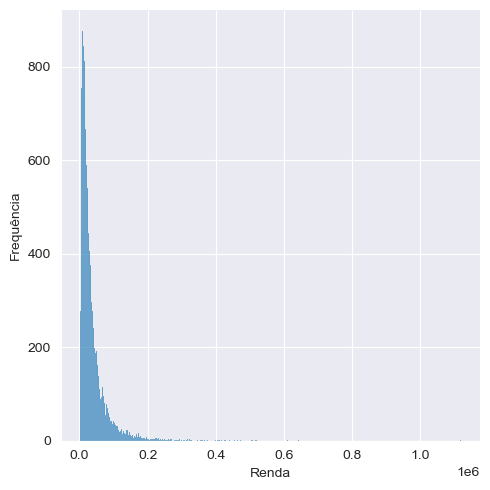

In [82]:
def plot_dist_data(data):
    ax = sns.displot(data)
    ax.set(xlabel="Renda", ylabel="Frequência")

    plt.show()


plot_dist_data(series)

## Plotar uma amostra dessa população de tamanho 10

Note que a amostragem é aleatória, e portanto, em cada execução vai gerar um gráfico diferente.

In [83]:
# Gera uma amostra de tamanho 100 dos dados. 
sample = series.sample(100)
sample

9021    9006.00
5798   85521.74
877    47489.72
2472    3505.86
4078   17883.66
         ...   
7132    4803.08
6956   85298.30
8248    3557.72
8871   10457.97
5707   53258.95
Name: 0, Length: 100, dtype: float64

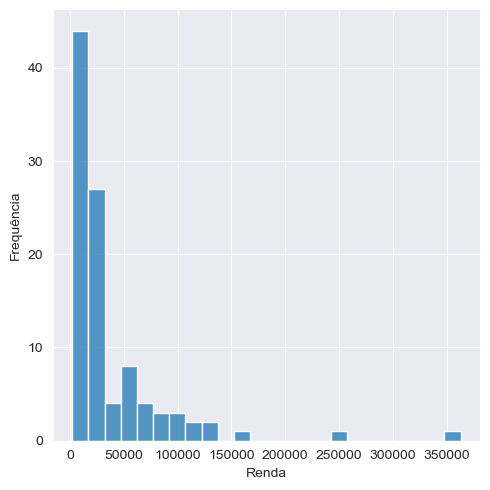

In [84]:
# Plota de fato a amostra
plot_dist_data(sample)

## Explorar os dados com base em estatísticas descritivas da amostra

Veja a média da amostra. Esse valor está dentro do esperado para a população?

Repita os últimos 3 passos (gerar amostra, plotar amostra, calcular média da amostra) algumas vezes para verificar o que acontece com a média. 

> Observação: os resultados de cada execução serão diferentes, pois estamos pegando amostras aleatórias.

In [85]:
sample.describe()

count      100.00
mean     37067.14
std      50954.51
min       2175.98
25%      10278.06
50%      19675.26
75%      46523.46
max     362866.74
Name: 0, dtype: float64

## Gerar métricas de um conjunto de amostras aleatórias

Vamos gerar 50 amostras aleatórias da população, calcular a média de cada amostra, plotar a distribuição das médias, e calcular a média das médias das amostras e o erro padrão.

Média das médias: 35909.78
Erro padrão: 6581.62


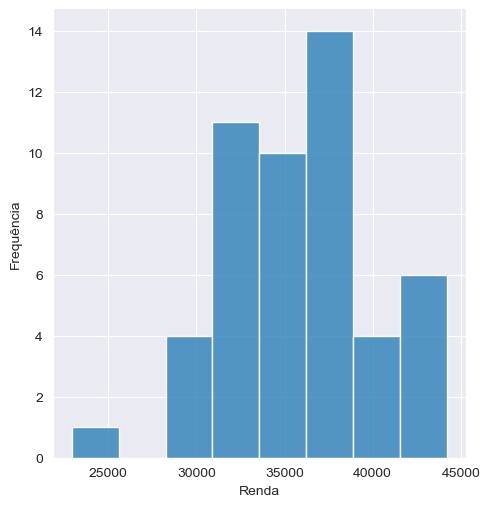

In [86]:
# Gerar N amostras de tamanho T e plota as médias das amostras
def analyze_samples(N=50, T=100):
    # Gera N amostras diferentes de tamanho T
    samples_list = [series.sample(T) for _i in range(0, N)]
    # Gera uma lista com a média de cada uma das amostras acima
    means_of_samples = [s.mean() for s in samples_list]

    # Média das médias
    mean_of_means = np.mean(means_of_samples)

    # Erro padrão
    std_error = series.std() / np.sqrt(len(means_of_samples))

    print("Média das médias: {:.2f}".format(mean_of_means))
    print("Erro padrão: {:.2f}".format(std_error))

    plot_dist_data(means_of_samples)



analyze_samples(50, 100)

## Analisar o conjunto de amostras
Repita a célula anterior algumas vezes. Observe o gráfico.

- Ele segue a distribuição Normal?
- As médias das médias das amostras estão próximas da média da população?
- E os erros padrões?


## Veja amostras maiores
Repita o processo apresentado (de gerar amostras, calcular médias e ver gráficos), mas agora com um número maior de amostras (100, 250, 500). 

Podemos observar que a distribuição das médias se aproxima mais da distribuição Normal? E o que acontece com o erro padrão?

Média das médias: 35943.49
Erro padrão: 4653.91


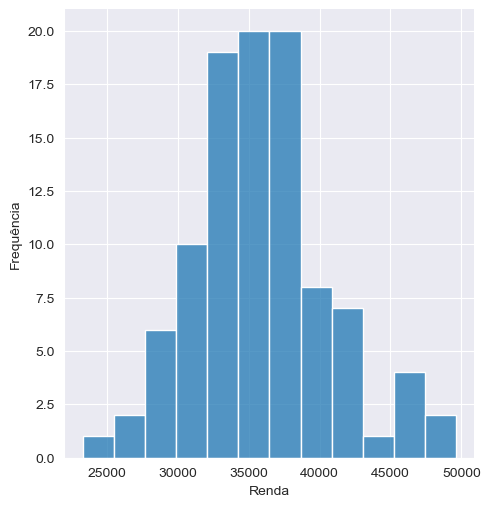

In [87]:
analyze_samples(N=100)

Média das médias: 36126.44
Erro padrão: 2943.39


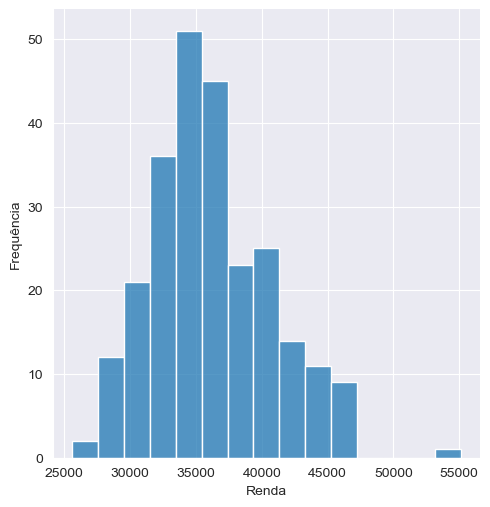

In [88]:
analyze_samples(N=250)

In [ ]:
analyze_samples(N=500)

## Verificar se uma amostra pertence a população

Leia o arquivo de amostra de rendas (renda_amostra1.csv). Verifique se essa amostra faz parte da população de renda (renda.csv) ou não: 
1. Calcule a média e o erro padrão;
2. Verifique a quantos erros da média da população a média da amostra está;


In [ ]:
sample_1 = pd.read_csv("./renda_amostra1.csv", index_col=False, header=None, squeeze=True)
sample_1

In [ ]:
series_mean = series.mean()
sample_1_mean = sample_1.mean()
std_error = series.std() / np.sqrt(len(sample_1))

print("Média da população: {:.2f}".format(series_mean))
print("Média da amostra: {:.2f}".format(sample_1_mean))
print("Erro padrão: {:.2f}".format(std_error))

In [ ]:
# Calcula a diferença entre a média da população e da amostra, em termos do erro padrão.
std_error_distance = abs(series_mean - sample_1_mean) / std_error

print("A diferença entre a média da população e da amostra é de {:.4f} erros padrão".format(std_error_distance))

# Exercícios

## 1. Leia os dados de uma população de pesos (_pesos_populacao.csv_)
Armazene na variável `population_weight`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [ ]:
# q1.hint()

population_weight = pd.read_csv("./pesos_populacao.csv", index_col=False, header=None, squeeze=True)
display(population_weight)

q1.check()

## 2. Analise a `Amostra 1`
Essa é uma atividade com múltiplas questões.

### 2.a. Leia o arquivo com os dados da amostra.
Armazene na variável `sample_1_weight`. 

Chame a função `q2.a.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.a.hint()`

In [ ]:
# q2.a.hint()

sample_1_weight = pd.read_csv("./pesos_amostra1.csv", index_col=False, header=None, squeeze=True)
display(sample_1_weight)

q2.a.check()

### 2.b. Verifique se a amostra pertence a população.
A amostra foi retirada ou não da população de pesos? Justifique

Armazene a resposta booleana na variável `is_sample_1_from_population`. 


Chame a função `q2.b.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.b.hint(n)` onde n é o número da dica.

> OBS: Mesmo que o corretor aceite respostas booleanas (e você pode "_roubar_" testando a resposta antes), será analisado também a justificativa.

In [ ]:
q2.b.hint(5)

population_weight_mean = population_weight.mean() #Média da população
sample_1_weight_mean = sample_1_weight.mean() #Média da amostra
sample_1_weight_std_error = population_weight.std() / np.sqrt(len(sample_1_weight)) #Erro padrão da amostra
sample_1_weight_std_error_distance = abs(population_weight_mean - sample_1_weight_mean) / sample_1_weight_std_error #Distância entre a média da população e da amostra, em termos do erro padrão.

print("Média da população: {:.2f}".format(population_weight_mean))
print("Média da amostra: {:.2f}".format(sample_1_weight_mean))
print("Erro padrão: {:.2f}".format(sample_1_weight_std_error))
print("A diferença entre a média da população e da amostra é de {:.4f} erros padrão".format(sample_1_weight_std_error_distance))

is_sample_1_from_population = True
display(is_sample_1_from_population)

q2.b.check()

#### É verdadeiro pois a diferença é de apenas 0.0679 desvios padrões, ou seja, podemos afirmar com um grau de confiança que a amostra foi retirada da população.

## 3. Analise a `Amostra 2`
Essa é uma atividade com múltiplas questões.

### 3.a. Leia o arquivo com os dados da amostra.
Armazene na variável `sample_2_weight`. 

Chame a função `q3.a.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q3.a.hint()`

In [ ]:
# q3.a.hint()

sample_2_weight = pd.read_csv("./pesos_amostra2.csv", index_col=False, header=None, squeeze=True)
display(sample_2_weight)

q3.a.check()

### 3.b. Verifique se a amostra pertence a população.
A amostra foi retirada ou não da população de pesos? Justifique

Armazene a resposta booleana na variável `is_sample_2_from_population`. 


Chame a função `q3.b.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q3.b.hint(n)` onde n é o número da dica.

> OBS: Mesmo que o corretor aceite respostas booleanas (e você pode "_roubar_" testando a resposta antes), será analisado também a justificativa.

In [ ]:
q2.b.hint(5)

sample_2_weight_mean = sample_2_weight.mean() #Média da amostra 2
sample_2_weight_std_error = population_weight.std() / np.sqrt(len(sample_2_weight)) #Erro padrão da amostra 2
sample_2_weight_std_error_distance = abs(population_weight_mean - sample_2_weight_mean) / sample_2_weight_std_error #Distância entre a média da população e da amostra, em termos do erro padrão.

print("Média da população: {:.2f}".format(population_weight_mean))
print("Média da amostra: {:.2f}".format(sample_2_weight_mean))
print("Erro padrão: {:.2f}".format(sample_2_weight_std_error))
print("A diferença entre a média da população e da amostra é de {:.4f} erros padrão".format(sample_2_weight_std_error_distance))


is_sample_2_from_population = False
display(is_sample_2_from_population)

q3.b.check()

#### É falso pois a diferença é de 59.2477 desvios padrões, ou seja, podemos afirmar com um grau de confiança que a amostra não foi retirada da população.

## 4. Analise a `Amostra 3`
Essa é uma atividade com múltiplas questões.

### 4.a. Leia o arquivo com os dados da amostra.
Armazene na variável `sample_3_weight`. 

Chame a função `q4.a.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q4.a.hint()`

In [ ]:
# q4.a.hint()

sample_3_weight = pd.read_csv("./pesos_amostra3.csv", index_col=False, header=None, squeeze=True)
display(sample_3_weight)

q4.a.check()

### 4.b. Verifique se a amostra pertence a população.
A amostra foi retirada ou não da população de pesos? Justifique

Armazene a resposta booleana na variável `is_sample_3_from_population`. 


Chame a função `q4.b.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q4.b.hint(n)` onde n é o número da dica.

> OBS: Mesmo que o corretor aceite respostas booleanas (e você pode "_roubar_" testando a resposta antes), será analisado também a justificativa.

In [ ]:
# q4.b.hint()

q2.b.hint(5)

sample_3_weight_mean = sample_3_weight.mean() #Média da amostra 2
sample_3_weight_std_error = population_weight.std() / np.sqrt(len(sample_3_weight)) #Erro padrão da amostra 2
sample_3_weight_std_error_distance = abs(population_weight_mean - sample_3_weight_mean) / sample_3_weight_std_error #Distância entre a média da população e da amostra, em termos do erro padrão.

print("Média da população: {:.2f}".format(population_weight_mean))
print("Média da amostra: {:.2f}".format(sample_3_weight_mean))
print("Erro padrão: {:.2f}".format(sample_3_weight_std_error))
print("A diferença entre a média da população e da amostra é de {:.4f} erros padrão".format(sample_3_weight_std_error_distance))

is_sample_3_from_population = False
display(is_sample_3_from_population)

q4.b.check()

#### É falso, pois a diferença é de 32.0455 desvios padrões, ou seja, podemos afirmar com um grau de confiança que a amostra não foi retirada da população.

## 5. Analise a `Amostra 4`
Essa é uma atividade com múltiplas questões.

### 5.a. Leia o arquivo com os dados da amostra.
Armazene na variável `sample_4_weight`. 

Chame a função `q5.a.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q5.a.hint()`

In [ ]:
# q5.a.hint()

sample_4_weight = pd.read_csv("./pesos_amostra4.csv", index_col=False, header=None, squeeze=True)
display(sample_4_weight)

q5.a.check()

### 5.b. Verifique se a amostra pertence a população.
A amostra foi retirada ou não da população de pesos? Justifique

Armazene a resposta booleana na variável `is_sample_4_from_population`. 


Chame a função `q5.b.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q5.b.hint(n)` onde n é o número da dica.

> OBS: Mesmo que o corretor aceite respostas booleanas (e você pode "_roubar_" testando a resposta antes), será analisado também a justificativa.

In [ ]:
# q5.b.hint()

sample_4_weight_mean = sample_4_weight.mean() #Média da amostra 2
sample_4_weight_std_error = population_weight.std() / np.sqrt(len(sample_4_weight)) #Erro padrão da amostra 2
sample_4_weight_std_error_distance = abs(population_weight_mean - sample_4_weight_mean) / sample_4_weight_std_error #Distância entre a média da população e da amostra, em termos do erro padrão.

print("Média da população: {:.2f}".format(population_weight_mean))
print("Média da amostra: {:.2f}".format(sample_4_weight_mean))
print("Erro padrão: {:.2f}".format(sample_4_weight_std_error))
print("A diferença entre a média da população e da amostra é de {:.4f} erros padrão".format(sample_4_weight_std_error_distance))

is_sample_4_from_population = False
display(is_sample_4_from_population)

q5.b.check()

#### É falso, pois a diferença é de 5.0986 desvios padrões, ou seja, podemos afirmar com um grau de confiança que a amostra não foi retirada da população.

## 6. Verifique se duas amostras são da mesma população.
É provável que as amostras 2 e 3 tenham vindo de uma mesma população? Justifique.

Essa atividade não tem `check`, mas você pode pedir dicas com `q6.hint()`

In [ ]:
 #q6.hint(0)

print("Média da amostra 2: {:.2f}".format(sample_2_weight_mean))
print("Média da amostra 3: {:.2f}".format(sample_3_weight_mean))

### Resposta para questão 6:
#### Obviamente não vieram da mesma popilação, não é preciso fazer uma análise bem detalhada, basta olhar para suas médias, como descrevi acima. A média da população 2 é de 72.84 e a da população 3 é de 210.21, sendo extremamanete improvável que as duas amostras tenham vindo da mesma população.